In [11]:
import matplotlib.pyplot as plt
from importlib import reload

import numpy as np
import pandas as pd

import sys
import os
sys.path.insert(0, os.path.abspath('../tesi_sabella'))

import model_codebase as cb
import cicids2017 as cicids2017
import data_generator as generator

reload(cicids2017)
reload(cb)
reload(generator)

pd.set_option('display.max_rows', 500)
pd.set_option('float_format', '{:.4f}'.format)
# plt.rcParams.update({'font.size': 28})

In [ ]:
def ncolors(n):
    hexl = list('0123456789ABCDEF')
    hexc = np.random.choice(hexl, size=(n, 6))
    return ['#' + ''.join(x) for x in hexc]

def mprint(s):
    display(Markdown(s))

### Dataset loading

In [ ]:
df = pd.read_pickle(f'../dataset/CICIDS2017_complete.pkl')
pr = cicids2017.Cicids2017Preprocessor(deltas=False, discretize=False)
df_preproc = pr.preprocessing(df, update=True)

### Model loading

In [7]:
# TODO: load model
df_subsample = df_preproc.groupby(level=["device_category", "host"], as_index=False)
df_subsample = df_subsample.apply(lambda ts: ts.iloc[-84:])
df_subsample = df_subsample.reset_index(level=0, drop=True)

ts2vec = cb.Ts2Vec()
host_point = ts2vec.to2Dmap(df_subsample) # list of <host, point>

### Plotting

In [18]:
# Hosts color mapping
hosts = host_point.index.get_level_values("host").unique()
colormap = dict(zip(hosts, ncolors(len(hosts))))

host_point["color"] = host_point.index.get_level_values("host").map(colormap)

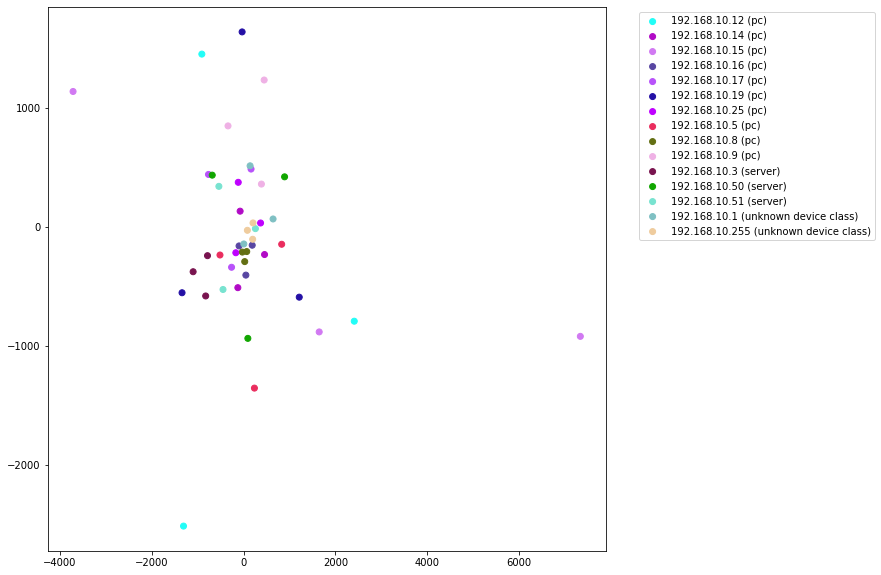

In [30]:
%matplotlib inline 

fig = plt.figure(figsize=(10,10))
ax3D = fig.add_subplot(111)

col_coords_color = [c for c in host_point.columns if "x" in c] + ["color"]

for (dev_cat, host), hdf in host_point.groupby(level=["device_category", "host"]):
    coords_df = hdf[col_coords_color]
    x1, x2, colors = list(zip(*coords_df.values))
    plt.scatter(x1, x2, color=colors, label=f"{host} ({dev_cat})")
    
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')